<a href="https://colab.research.google.com/github/marioesm/TFM---CODIGO/blob/main/Data_Exploding_Impute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectando Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importando librerías

In [2]:
!pip install -q hyperimpute
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00


In [3]:
import re
import numpy as np
import pandas as pd

# Importando datos

In [4]:
file_path = '/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_post_sentimiento.csv'
df_encuesta = pd.read_csv(file_path)

In [5]:
df_encuesta[['transicion_ecologica_sin_stopwords_lemma_salida',
       'haria_falta_futuro_sin_stopwords_lemma_salida']]

,transicion_ecologica_sin_stopwords_lemma_salida,haria_falta_futuro_sin_stopwords_lemma_salida
0,"AnalyzerOutput(output=NEG, probas={NEG: 0.719,...","AnalyzerOutput(output=NEU, probas={NEU: 0.494,..."
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.860,...","AnalyzerOutput(output=NEU, probas={NEU: 0.801,..."
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.487,...","AnalyzerOutput(output=NEU, probas={NEU: 0.615,..."
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.494,...","AnalyzerOutput(output=NEU, probas={NEU: 0.520,..."
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.885,...","AnalyzerOutput(output=NEU, probas={NEU: 0.709,..."
...,...,...
3097,"AnalyzerOutput(output=NEU, probas={NEU: 0.654,...","AnalyzerOutput(output=NEU, probas={NEU: 0.808,..."
3098,"AnalyzerOutput(output=NEG, probas={NEG: 0.950,...","AnalyzerOutput(output=NEU, probas={NEU: 0.624,..."
3099,"AnalyzerOutput(output=NEU, probas={NEU: 0.698,...","AnalyzerOutput(output=NEU, probas={NEU: 0.641,..."
3100,"AnalyzerOutput(output=NEG, probas={NEG: 0.767,...","AnalyzerOutput(output=NEU, probas={NEU: 0.753,..."


# Transformación de datos

## Explotando el diccionario

In [6]:
def col_exploding(col_name, df):
  col_name_neg = col_name + '_neg'
  col_name_pos = col_name + '_pos'
  col_name_neu = col_name + '_neu'
  df[col_name] = df[col_name].astype(str).str.extract(r'probas=(\{.*?\})')
  df[col_name_neu] = df[col_name].str.extract(r'NEU: ([\d.]+)').astype(float)
  df[col_name_pos] = df[col_name].str.extract(r'POS: ([\d.]+)').astype(float)
  df[col_name_neg] = df[col_name].str.extract(r'NEG: ([\d.]+)').astype(float)
  return df

In [7]:
columnas = df_encuesta.iloc[1:1, -2:].columns.to_list()
columnas

['transicion_ecologica_sin_stopwords_lemma_salida',
 'haria_falta_futuro_sin_stopwords_lemma_salida']

In [8]:
for columna in columnas:
  df_encuesta=col_exploding(columna, df_encuesta)

In [9]:
df_encuesta.to_csv('/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_eda.csv', index=False) # Guardando datos sin imputación de nulos para EDA

In [10]:
df_encuesta.columns.to_list()

['provincia',
 'precios_energia',
 'modelo_productivo',
 'viajes_frecuentemente',
 'ocupacion',
 'cop_cumbre',
 'vivir_padres_1_10',
 'solucion_crisis_vendra',
 'genero',
 'origen',
 'cambio_climatico_el_heteropatriarcado',
 'cambio_climatico_los_intereses_cientificos',
 'cambio_climatico_los_intereses_de_los_medios_de_comunicacion',
 'cambio_climatico_los_intereses_empresariales',
 'cambio_climatico_los_intereses_politicos',
 'crisis_climatica_es_un_tema_que_me_cansa_ya',
 'crisis_climatica_me_agobia',
 'crisis_climatica_me_da_igual',
 'crisis_climatica_me_preocupa',
 'crisis_climatica_se_le_esta_dando_demasiada_importancia',
 'crisis_climatica_siento_esperanza',
 'crisis_climatica_tengo_miedo',
 'aparatos_electronicos_e_books',
 'aparatos_electronicos_ordenador',
 'aparatos_electronicos_tablets',
 'aparatos_electronicos_television',
 'aparatos_electronicos_telefono_con_acceso_a_internet',
 'priorizar_inversiones_en_energia_hidraulica',
 'priorizar_inversiones_en_energia_nuclear',
 'p

In [11]:
df = df_encuesta.iloc[:,-6:].reset_index()
df_melt = df.melt('index', var_name='Resultados', value_name='Score')


In [12]:
df_melt["Resultado_general"] = df_melt["Resultados"].str[:-31]
df_melt["tipo_pregunta"] = df_melt["Resultados"].str[-3:]

In [13]:
# Calculamos la puntuación máxima para cada grupo
last = df_melt.groupby(['index', 'Resultado_general'])['Score'].transform('max')

# Creamos una nueva columna para marcar las filas con la puntuación más alta
df_melt['respuesta'] = (df_melt['Score'] == last).astype(int)



In [14]:
df_melt['tipo_pregunta'] = df_melt['tipo_pregunta'].str.replace('neu','neutral')
df_melt['tipo_pregunta'] = df_melt['tipo_pregunta'].str.replace('pos','positivo')
df_melt['tipo_pregunta'] = df_melt['tipo_pregunta'].str.replace('neg','negativo')


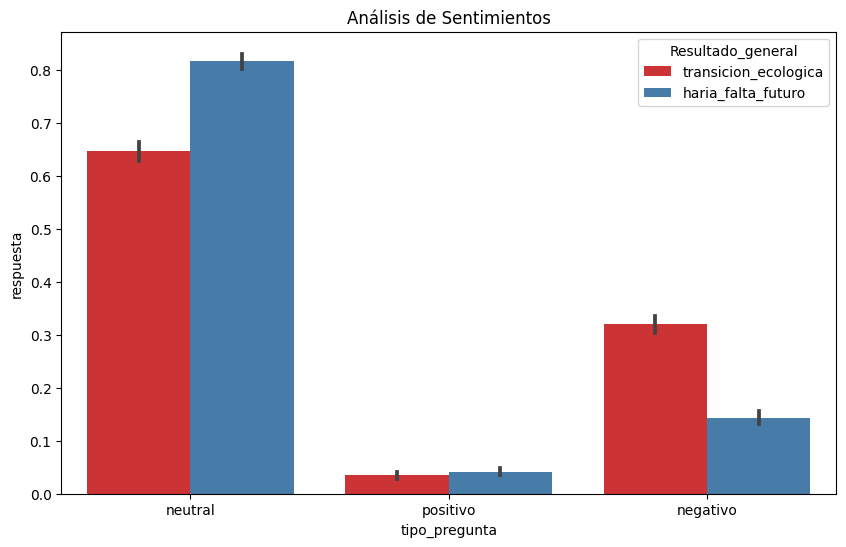

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecemos la paleta de colores
sns.set_palette("Set1")

# Creamos el diagrama de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="tipo_pregunta", y="respuesta", hue="Resultado_general", data=df_melt)

# Establecemos el título
plt.title("Análisis de Sentimientos")

# Muestra el gráfico
plt.show()


In [16]:
df_melt.sort_values('index')

,index,Resultados,Score,Resultado_general,tipo_pregunta,respuesta
0,0,transicion_ecologica_sin_stopwords_lemma_salid...,0.264,transicion_ecologica,neutral,0
6204,0,transicion_ecologica_sin_stopwords_lemma_salid...,0.719,transicion_ecologica,negativo,1
12408,0,haria_falta_futuro_sin_stopwords_lemma_salida_pos,0.152,haria_falta_futuro,positivo,0
3102,0,transicion_ecologica_sin_stopwords_lemma_salid...,0.017,transicion_ecologica,positivo,0
15510,0,haria_falta_futuro_sin_stopwords_lemma_salida_neg,0.354,haria_falta_futuro,negativo,0
...,...,...,...,...,...,...
12407,3101,haria_falta_futuro_sin_stopwords_lemma_salida_neu,0.629,haria_falta_futuro,neutral,1
6203,3101,transicion_ecologica_sin_stopwords_lemma_salid...,0.157,transicion_ecologica,positivo,0
3101,3101,transicion_ecologica_sin_stopwords_lemma_salid...,0.680,transicion_ecologica,neutral,1
15509,3101,haria_falta_futuro_sin_stopwords_lemma_salida_pos,0.164,haria_falta_futuro,positivo,0


In [17]:
df_melt

,index,Resultados,Score,Resultado_general,tipo_pregunta,respuesta
0,0,transicion_ecologica_sin_stopwords_lemma_salid...,0.264,transicion_ecologica,neutral,0
1,1,transicion_ecologica_sin_stopwords_lemma_salid...,0.860,transicion_ecologica,neutral,1
2,2,transicion_ecologica_sin_stopwords_lemma_salid...,0.487,transicion_ecologica,neutral,1
3,3,transicion_ecologica_sin_stopwords_lemma_salid...,0.494,transicion_ecologica,neutral,1
4,4,transicion_ecologica_sin_stopwords_lemma_salid...,0.885,transicion_ecologica,neutral,1
...,...,...,...,...,...,...
18607,3097,haria_falta_futuro_sin_stopwords_lemma_salida_neg,0.076,haria_falta_futuro,negativo,0
18608,3098,haria_falta_futuro_sin_stopwords_lemma_salida_neg,0.028,haria_falta_futuro,negativo,0
18609,3099,haria_falta_futuro_sin_stopwords_lemma_salida_neg,0.053,haria_falta_futuro,negativo,0
18610,3100,haria_falta_futuro_sin_stopwords_lemma_salida_neg,0.032,haria_falta_futuro,negativo,0


# Imputación de nulos por medio de Random Forest (missforest)

In [18]:
from hyperimpute.plugins.imputers import Imputers

Imputers().list()

['miwae',
 'sklearn_missforest',
 'ice',
 'nop',
 'median',
 'mice',
 'EM',
 'sklearn_ice',
 'missforest',
 'gain',
 'softimpute',
 'most_frequent',
 'hyperimpute',
 'sinkhorn',
 'mean',
 'miracle']

In [19]:
# Reemplaza 0 con NaN en una columna específica
column_to_convert = 'vivir_padres_1_10'
df_encuesta[column_to_convert] = df_encuesta[column_to_convert].replace(0.0, np.nan)

In [20]:
df_encuesta['vivir_padres_1_10'].value_counts(dropna=False)

1.0     675
3.0     646
4.0     385
NaN     364
2.0     307
5.0     305
6.0     134
8.0      96
7.0      92
10.0     57
9.0      41
Name: vivir_padres_1_10, dtype: int64

In [21]:
plugin = Imputers().get("missforest")
out = plugin.fit_transform(df_encuesta.copy())

In [22]:
out.columns = df_encuesta.columns

In [23]:
out['vivir_padres_1_10'].value_counts()

1.000000    675
3.000000    646
4.000000    385
2.000000    307
5.000000    305
           ... 
3.092908      1
3.059520      1
3.578893      1
3.711244      1
3.376439      1
Name: vivir_padres_1_10, Length: 374, dtype: int64

In [24]:
out.count()

provincia                                              3102
precios_energia                                        3102
modelo_productivo                                      3102
viajes_frecuentemente                                  3102
ocupacion                                              3102
                                                       ... 
transicion_ecologica_sin_stopwords_lemma_salida_pos    3102
transicion_ecologica_sin_stopwords_lemma_salida_neg    3102
haria_falta_futuro_sin_stopwords_lemma_salida_neu      3102
haria_falta_futuro_sin_stopwords_lemma_salida_pos      3102
haria_falta_futuro_sin_stopwords_lemma_salida_neg      3102
Length: 123, dtype: int64

In [25]:
out.to_csv('/content/gdrive/MyDrive/UCM/Mario/Data/el-futuro-es-clima-anonimizado_pre_pca.csv', index=False)

# Nubes de palabras


In [26]:
pip install pandas matplotlib wordcloud


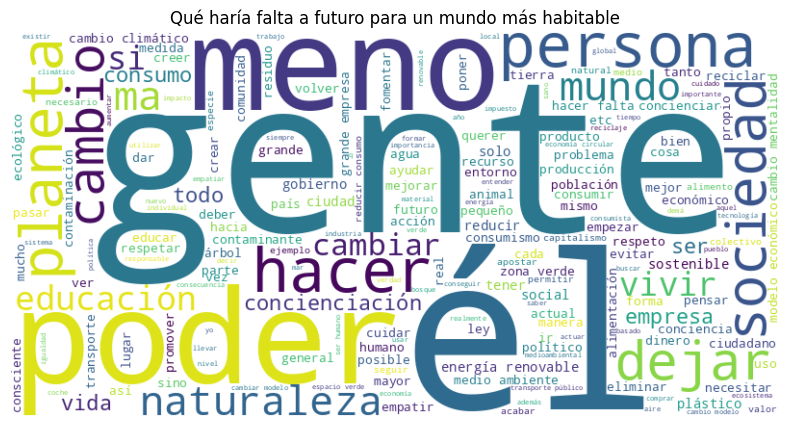

In [27]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df_encuesta['haria_falta_futuro_sin_stopwords_lemma'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Qué haría falta a futuro para un mundo más habitable')
plt.show()



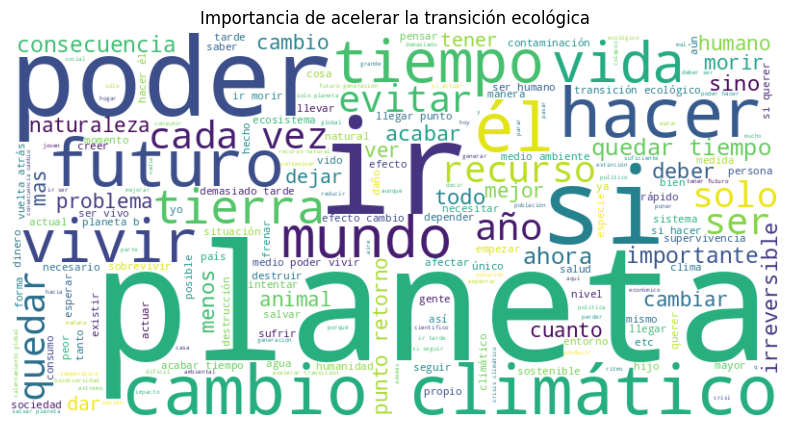

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df_encuesta['transicion_ecologica_sin_stopwords_lemma'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Importancia de acelerar la transición ecológica')
plt.show()



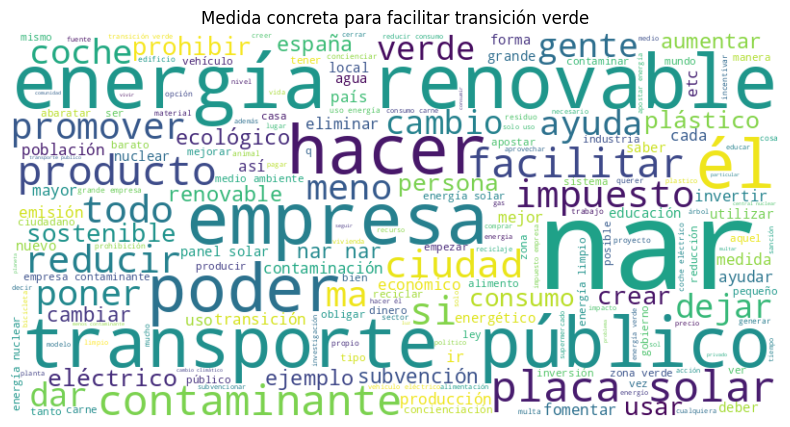

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ''
for text in df_encuesta['medida_concreta_sin_stopwords_lemma']:
    if isinstance(text, str):
        all_text += text + ' '

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Medida concreta para facilitar transición verde')
plt.show()



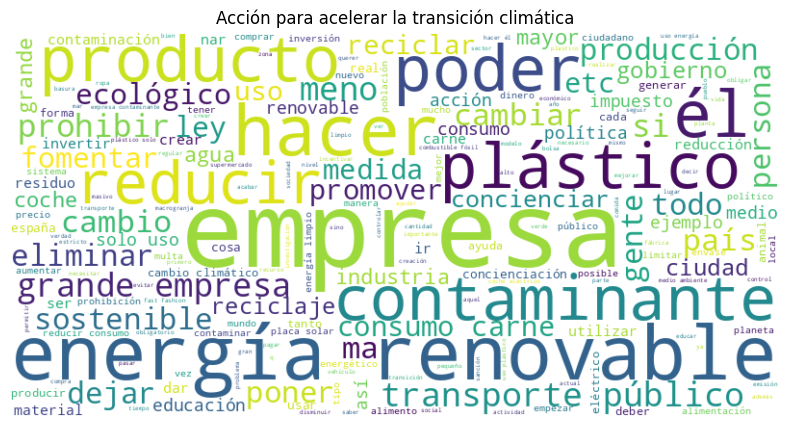

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(str(text) for text in df_encuesta['accion_transicion_climatica_sin_stopwords_lemma'] if not pd.isnull(text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Acción para acelerar la transición climática')
plt.show()



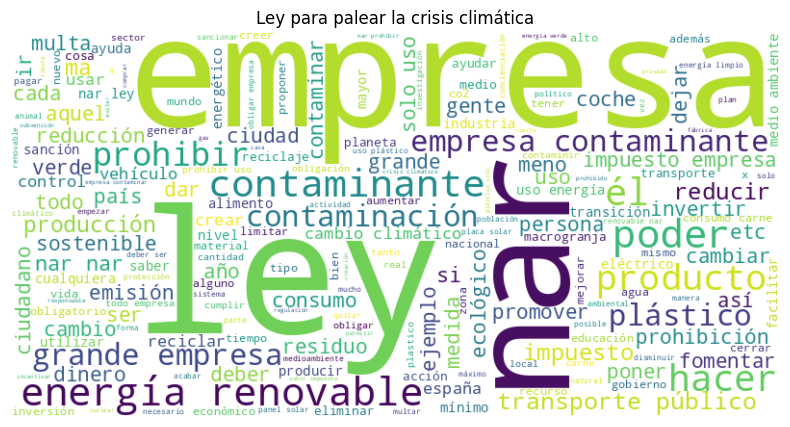

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(str(text) for text in df_encuesta['ley_congreso_crisis_climatica_sin_stopwords_lemma'] if not pd.isnull(text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ley para palear la crisis climática')
plt.show()

